## Câu 1. Giảm chiều dữ liệu
Tập tin Phan_lop.csv chứa những mẫu dữ liệu phân lớp cho các đối tượng thuộc về một trong 6 lớp
(class): 0..5, dựa trên các thuộc tính f1, f2, …, f12 của đối tượng.
1.1) Áp dụng phương pháp PCA để giảm xuống k chiều (2 < k < 12) so với dữ liệu gốc.
Giải thích nguyên nhân (hay cơ sở) về số chiều được giảm.
1.2) Giảm chiều xuống còn k = 2 và trực quan hóa dữ liệu. Nhận xét kết quả.

In [2]:
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns
import csv
from sklearn.decomposition import PCA


In [4]:
data   = pd.read_csv('Phan_lop.csv')
# print(data.head(), '\n')

         f1         f2        f3        f4        f5        f6         f7  \
0 -2.403589  -0.218339 -3.015506  2.187585 -1.415101 -0.000049   2.920957   
1 -0.922966   6.564721  8.542600 -3.676891  1.526910 -6.132242  -1.284702   
2  9.381326  -0.157043  9.674137  4.059390  9.150245 -8.320246  10.076978   
3 -7.610665 -10.375051  0.398027 -6.178855  5.848558  2.276540  -1.726164   
4  8.586239  -4.265564  4.788978  4.309953  2.938052 -4.294121   6.980088   

          f8         f9       f10       f11       f12  Class  
0  -4.165317  -2.237563  1.567810  4.056278 -5.816942      3  
1  -7.841047  10.161966 -1.933277  8.959247 -2.492584      4  
2 -11.596349  -2.900057 -1.890156  0.390029 -5.383296      0  
3   9.378226   1.146725 -9.630693 -8.620247 -0.552103      2  
4  -9.878268  -5.017204  0.154492  7.647917 -1.004416      0   



*** b) Áp dụng PCA để giảm xuống còn k chiều (2 < k < 12) ***
CÁCH 1: Chọn k dựa trên đồ thị biểu diễn phương sai tích lũy 
-------------------------------------------------------------


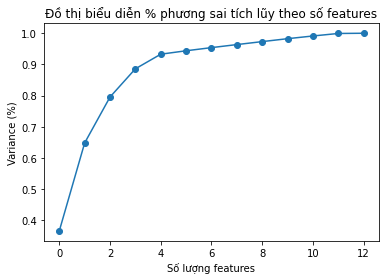

Phân tích chi tiết theo k: 

   * Với k =  1 --> phương sai tích lũy 36.59%
      - Ma trận trị riêng LAMBDA (1,)
      - Chuyển vị của ma trận vectơ riêng P_T (1, 13) : 

   * Với k =  2 --> phương sai tích lũy 64.80%
      - Ma trận trị riêng LAMBDA (2,)
      - Chuyển vị của ma trận vectơ riêng P_T (2, 13) : 

   * Với k =  3 --> phương sai tích lũy 79.54%
      - Ma trận trị riêng LAMBDA (3,)
      - Chuyển vị của ma trận vectơ riêng P_T (3, 13) : 

   * Với k =  4 --> phương sai tích lũy 88.59%
      - Ma trận trị riêng LAMBDA (4,)
      - Chuyển vị của ma trận vectơ riêng P_T (4, 13) : 

   * Với k =  5 --> phương sai tích lũy 93.28%
      - Ma trận trị riêng LAMBDA (5,)
      - Chuyển vị của ma trận vectơ riêng P_T (5, 13) : 

   * Với k =  6 --> phương sai tích lũy 94.38%
      - Ma trận trị riêng LAMBDA (6,)
      - Chuyển vị của ma trận vectơ riêng P_T (6, 13) : 

   * Với k =  7 --> phương sai tích lũy 95.39%
      - Ma trận trị riêng LAMBDA (7,)
      - Chuyển vị của ma trậ

In [5]:
print('*** b) Áp dụng PCA để giảm xuống còn k chiều (2 < k < 12) ***')
print('=============================================================')
#   https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
#   - The pca.explained_variance_ratio_ returns a vector of the variance explained by each dimension.
#   - The pca.explained_variance_ratio_[i] gives the variance explained solely by the i+1st dimension.
#   - The pca.explained_variance_ratio_.cumsum() will return a vector x 
#     such that x[i] returns the cumulative variance explained by the first i+1 dimensions.

#   (1) PCA().components_: Chuyển vị của ma trận vectơ riêng EigenVectors.T
#   (2) PCA().explained_variance_: Các giá trị riêng
#   (3) PCA().explained_variance_ratio_: Tỷ lệ phương sai so với dữ liệu gốc
#   (4) Hàm numpy.cumsum()

##------------------------------------------------------------------------------
print('CÁCH 1: Chọn k dựa trên đồ thị biểu diễn phương sai tích lũy ')
print('-------------------------------------------------------------')
##------------------------------------------------------------------------------
pca = PCA().fit(data)

# Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Số lượng features')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features')
plt.show()
# Nhận xét:
#   - #f =  0: giữ lại    0%  phương sai so với dữ liệu gốc
#   - #f =  3: giữ lại ~ 85%  phương sai so với dữ liệu gốc
#   - #f >  3: giữ lại > 90%  phương sai so với dữ liệu gốc

print('Phân tích chi tiết theo k: \n')
for k in range(1, 13):
    pca = PCA(k)
    pca.fit(data)
      
    var = pca.explained_variance_ratio_.sum() * 100
    print('   * Với k = %2d' %k, '--> phương sai tích lũy %.2f%%' %var)

    # Test - BEGIN
    print('      - Ma trận trị riêng LAMBDA', pca.explained_variance_.shape)   
    print('      - Chuyển vị của ma trận vectơ riêng P_T', pca.components_.shape, ': \n')
    # Test - END


##------------------------------------------------------------------------------
print('-------------------------------------------------------------')
print('CÁCH 2: Chọn k dựa trên ngưỡng phương sai tích lũy mong muốn ')
print('-------------------------------------------------------------')
##------------------------------------------------------------------------------
print('   * Giả sử muốn giữ lại 90%')
threshold = .9
percent   = threshold * 100
pca       = PCA(threshold)

pca.fit(data)
k   = pca.n_components_
var = sum(pca.explained_variance_ratio_) * 100
print('      - Muốn phương sai tích lũy >= %.2f%%' %percent, 'thì k >= %d' %k,
      ' (k = %d' %k, '--> %.2f%%)' %var, '\n')

print('   * Phân tích chi tiết theo ngưỡng phương sai:')
A = np.array([.5, .6, .7, .8, .9, .95, .99])
for x in A:
    percent   = x * 100
    pca       = PCA(x)

    pca.fit(data)
    k   = pca.n_components_
    var = sum(pca.explained_variance_ratio_) * 100
    print('      - Muốn phương sai tích lũy >= %.2f%%' %percent, 'thì k >= %2d' %k,
          ' (k = %2d' %k, '--> %.2f%%)' %var)


*** c) Giảm chiều còn k = 2 và trực quan hóa dữ liệu      ***
- Ma trận B_T         PC 1       PC 2
0  -0.692211  -1.070005
1  -4.781787  -3.437346
2 -16.692405  -8.542941
3  -3.687761  24.972640
4  -8.926874  -9.483645 



<Figure size 576x432 with 0 Axes>

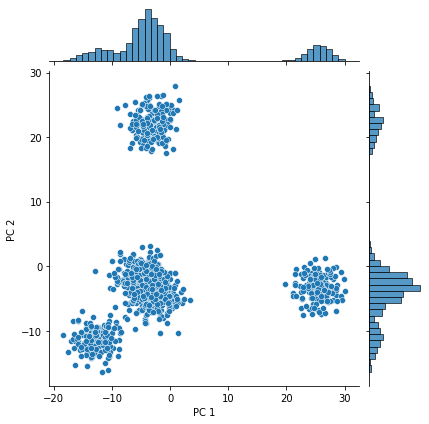

        PC 1       PC 2  Class
0  -0.692211  -1.070005      3
1  -4.781787  -3.437346      4
2 -16.692405  -8.542941      0
3  -3.687761  24.972640      2
4  -8.926874  -9.483645      0 



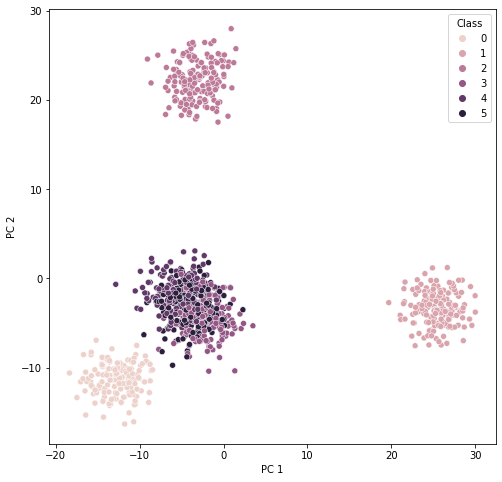

In [6]:
print('\n=============================================================')
print('*** c) Giảm chiều còn k = 2 và trực quan hóa dữ liệu      ***')
print('=============================================================')
k   = 2
pca = PCA(k)
pca.fit(data)

# transform data
B = pca.transform(data)
principalDf = pd.DataFrame(data = B, columns = ['PC 1', 'PC 2'])
print('- Ma trận B_T', principalDf.head(), '\n')

# Trực quan hóa dữ liệu (KHÔNG phân loại)
plt.figure(figsize = (8, 6))
sns.jointplot(x = 'PC 1', y = 'PC 2', data = principalDf)              
plt.show()

# Lấy cột phân loại (Class) trong file dữ liệu
y = np.array(data.Class)
y = pd.DataFrame(data = y, columns = ['Class'])

# Ghép cột phân loại (Class) vào ma trận PCA
finalDf = pd.concat([principalDf, y], axis = 1)
print(finalDf.head(), '\n')

# Trực quan hóa dữ liệu (CÓ phân loại)
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'PC 1', y = 'PC 2', data = finalDf, hue = 'Class', legend = 'full')              
plt.show()


## Câu 2. Hồi quy tuyến tính
Tập tin IQ2.xls chứa những mẫu dữ liệu được thu thập về mối quan hệ giữa chỉ số IQ với các điểm thi
môn Toán (diemToan) và môn Anh văn (diemAV) của sinh viên.

2.1) Tính các giá trị thống kê cơ bản của chỉ số IQ và điểm thi của các môn.

2.2) Xác định outlier(s), nếu có, của chỉ số IQ và điểm thi của các môn dựa trên các z-scores.

2.3) Chọn điểm thi của 1 trong các môn làm cơ sở để dự đoán chỉ số IQ theo phương pháp hồi quy
tuyến tính. Trực quan hóa dữ liệu và giải thích nguyên nhân của sự lựa chọn.

2.4) Dự đoán các giá trị IQ tương ứng với x  { 2.0, 5.0, 8.0, 9.5 }.


In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sns

from numpy import mean, median
from scipy import stats



data2     = pd.read_excel('IQ2.xls')

# print("Column headings:")
# print(data2.columns)
# dataf = pd.DataFrame('IQ')
# IQ = pd.DataFrame.columns
diemToan = np.array([data2['diemToan']])
print(diemToan)
diemAV = np.array([data2['diemAV']])
print(diemAV)
IQ = np.array([data2['IQ']])
print(IQ)

ModuleNotFoundError: No module named 'seaborn'

In [21]:
print('*** a. Những thống kê cơ bản trên dữ liệu  IQ ***')
print('================================================')
print('Mean   x_    =', mean(IQ))
print('MIN    x_min =', min(IQ))
print('MAX    x_max =', max(IQ))
print('Median x_med =', median(IQ))

x_mod = stats.mode(IQ)
print('Mode   x_mod =', x_mod[0][0])
print('       f(x)  =', x_mod[1][0]) # số lần freq.

range_life = np.ptp(IQ)
print('Range        =', range_life)

var_life = np.var(IQ)
print('Variance     =', var_life)

std_life = np.std(IQ)
print('Std-dev.     =', std_life)

print('***  Những thống kê cơ bản trên dữ liệu  Toan ***')
print('================================================')
print('Mean   x_    =', mean(diemToan))
print('MIN    x_min =', min(diemToan))
print('MAX    x_max =', max(diemToan))
print('Median x_med =', median(diemToan))

x_mod = stats.mode(diemToan)
print('Mode   x_mod =', x_mod[0][0])
print('       f(x)  =', x_mod[1][0]) # số lần freq.

range_life = np.ptp(diemToan)
print('Range        =', range_life)

var_life = np.var(diemToan)
print('Variance     =', var_life)

std_life = np.std(diemToan)
print('Std-dev.     =', std_life)

print('***  Những thống kê cơ bản trên dữ liệu  AV ***')
print('================================================')
print('Mean   x_    =', mean(diemAV))
print('MIN    x_min =', min(diemAV))
print('MAX    x_max =', max(diemAV))
print('Median x_med =', median(diemAV))

x_mod = stats.mode(diemAV)
print('Mode   x_mod =', x_mod[0][0])
print('       f(x)  =', x_mod[1][0]) # số lần freq.

range_life = np.ptp(diemAV)
print('Range        =', range_life)

var_life = np.var(diemAV)
print('Variance     =', var_life)

std_life = np.std(diemAV)
print('Std-dev.     =', std_life)

*** a. Những thống kê cơ bản trên dữ liệu  IQ ***
Mean   x_    = 115.2
MIN    x_min = 68
MAX    x_max = 140
Median x_med = 120.0
Mode   x_mod = 110
       f(x)  = 2
Range        = 72
Variance     = 471.56000000000006
Std-dev.     = 21.715432300555292
***  Những thống kê cơ bản trên dữ liệu  Toan ***
Mean   x_    = 5.92
MIN    x_min = 2.0
MAX    x_max = 9.6
Median x_med = 5.8
Mode   x_mod = 4.4
       f(x)  = 2
Range        = 7.6
Variance     = 4.6575999999999995
Std-dev.     = 2.1581473536345936
***  Những thống kê cơ bản trên dữ liệu  AV ***
Mean   x_    = 6.859999999999999
MIN    x_min = 2.5
MAX    x_max = 9.2
Median x_med = 7.1
Mode   x_mod = 7.2
       f(x)  = 2
Range        = 6.699999999999999
Variance     = 3.0553999999999997
Std-dev.     = 1.7479702514631077


<AxesSubplot:>

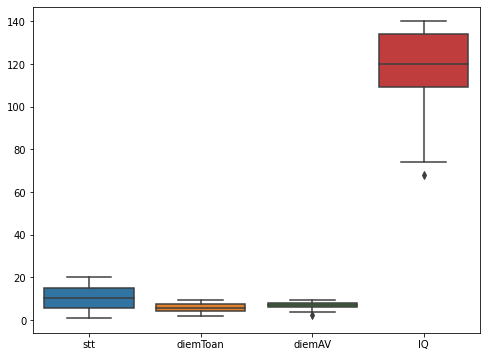

In [34]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = data2)
# plt.ylabel('IQ')
# plt.xlabel('Number')
# plt.show()

# plt.figure(figsize = (8, 6))
# sns.boxplot(diemToan)
# plt.ylabel('Math')
# plt.xlabel('Score')
# plt.show()

# plt.figure(figsize = (8, 6))
# sns.boxplot(diemAV)
# plt.ylabel('AV')
# plt.xlabel('Score')
# plt.show()


In [2]:
''' Nhận xét:
    - diemToan không có outlier
    - IQ và diemAV có outliers
'''
z_scoresdiemAV = stats.zscore(diemAV)
print('Z-scoresAV:\n', z_scoresdiemAV)

z_scoresdiemIQ = stats.zscore(IQ)
print('Z-scoresIQ:\n', z_scoresdiemIQ)

for i in range (0,len(z_scoresdiemAV)):
    if -2>= z_scoresdiemAV[i] or z_scoresdiemAV[i] >= 2:
        print(z_scoresdiemAV[i])

for i in range (0,len(z_scoresdiemIQ)):
    if -1>= z_scoresdiemIQ[i] or z_scoresdiemIQ[i] >= 1:
        print(z_scoresdiemIQ[i])

# '''
# outliers_setosa = number_z_score_setosa[[(n <=-2.5)|(n>=2.5) for n in number_z_score_setosa]]
# indexes_setosa = [number_z_score_setosa.tolist().index(i) for i in outliers_setosa]
# print("Indexes:", indexes_setosa)
# print("Outliers:\n", pental_lenght_Iris_setosa[indexes_setosa])
# '''

NameError: name 'stats' is not defined

In [74]:
print('\n---------- Cách 3: Giải bằng thư viện scikit-learn ----------')
from sklearn import linear_model

## Thêm 1 cột chứa giá trị 1 vào cột đầu tiên của x --> xBar
one   = np.ones((diemToan.T.shape[0], 1))
Math = np.concatenate((one, diemToan.T), axis = 1)

## fit_intercept = False for calculating the bias
regr = linear_model.LinearRegression(fit_intercept = False) 
IQ_T = IQ.T
regr.fit(Math, IQ_T)


print('Sử dụng scikit-learn:', regr.coef_)



---------- Cách 3: Giải bằng thư viện scikit-learn ----------
Sử dụng scikit-learn: [[63.2322226   8.77834078]]
